# **DCT (Discrete Cosine Transform) source code**
It reduces the image size by 8 times

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import cv2
import numpy as np

import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.colors import Normalize
from PIL import Image

# write arr to excel
def write_xlsx(arr, path):
    return pd.DataFrame(arr).to_excel(path)

# load img as arr
def load_img(img):
    return cv2.imread(img)

# convert rgb to yub
def rgb2yuv(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split channel
def split_channel(img):
    return cv2.split(img)

# Get scale alpha
def get_Q(q_jpeg):
    QTable = np.array([[16,11,10,16, 24,40, 51, 61],
                   [12,12,14,19, 26,48, 60, 55],
                   [14,13,16,24, 40,57, 69, 56],
                   [14,17,22,29, 51,87, 80, 62],
                   [18,22,37,56, 68,109,103,77],
                   [24,35,55,64, 81,104,113,92],
                   [49,64,78,87,103,121,120,101],
                   [72,92,95,98,112,100,103,99]])
    
    if q_jpeg < 50 and q_jpeg > 1:
        alpha = np.floor(5000.0/q_jpeg)
        Q = QTable*alpha
    elif q_jpeg < 100:
        alpha = np.floor(200 - 2*q_jpeg)
        Q = QTable*alpha
    elif q_jpeg == 100:
        Q = np.ones((8, 8))
    else:
        raise AttributeError("Quality Factor must be in the range [1..100]")
    return Q


def get_mse(prediction, target):
    return np.sqrt(((prediction-target)**2).mean())

def get_psnr(mse):
    return 20*np.log10(255/np.sqrt(mse))

def demo(qf, source):
    QF = qf
    # Init block 8x8
    block = 8
    h, w = np.array(source.shape[:2])/block*block
    h, w = int(h), int(w)
    source = source[:h, :w]

    blocksV = int(h/block)
    blocksH = int(w/block)
    vis0 = np.zeros((h, w), np.float32)
    result = np.zeros((h, w), np.float32)
    #result = np.zeros((blocksV, blocksH), np.float32)
    vis0[:h, :w] = source
    Q = get_Q(QF)

    # Perform DCT 8x8
    for row in range(blocksV):
        for col in range(blocksH):
            current_block = vis0[row*block:(row+1)*block, col*block:(col+1)*block]
            dct = cv2.dct(current_block)
            #if row==0 and col==0:
                #print('\nfirst block 8x8 of DCT(source) lossless:\n', np.round(dct).astype(int))
            result_ = np.round(dct/Q).astype(int)
            result[row*block:(row+1)*block, col*block:(col+1)*block] = result_


    # Convert back use IDCT
    back = np.zeros((h, w), np.float32)
    #back = np.zeros((blocksV, blocksH), np.float32)
    for row in range(blocksV):
        for col in range(blocksH):
            current_block = result[row*block:(row+1)*block, col*block:(col+1)*block]
            idct = cv2.idct(current_block*Q)
            back[row*block:(row+1)*block, col*block:(col+1)*block] = np.round(idct).astype(int)

    mse = get_mse(back, y)
    psnr = np.round(get_psnr(mse), 2)

    r=0
    c=0
    new_result_arr = np.zeros((blocksV, blocksH), np.float32)
    #heig, wid = new_result_arr.shape[:2]
    #print("The height of the image is: ", heig)
    #print("The width of the image is: ", wid)

    # DIMENSION CHANGER (DIMENSION/8)
    temp =0
    for row in range(blocksV*block):
      for col in range(blocksH*block):
        if((row%8 == 0) and (col%8 == 0) ):
          new_result_arr[r][c] = result[row][col]
          c = c+1
      temp = temp+1
      if(temp %8==0):
        r = r+1
      c=0

    new_result_arr = new_result_arr.astype(np.uint8)
    img  = Image.fromarray(new_result_arr)
    return img


In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import PIL
from PIL import Image

folder_dir = "/content/drive/MyDrive/Colab Notebooks/catsdogs/train/cats"
folder_dir1 = "/content/drive/MyDrive/Colab Notebooks/catsdogs/train/dogs"

folder_dir2 = "/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/train/cats"
folder_dir3 = "/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/train/dogs"
temp=0

for images in os.listdir(folder_dir):
    tempPath = os.path.join(folder_dir, images)
    # Load source.jpg
    source = load_img(tempPath)
    # convert source.jpg to YUV Channel
    yuv = rgb2yuv(source)
    # split YUV channel
    y, u, v = split_channel(yuv)

    # Perform DCT with Y Channel as source
    np.set_printoptions(precision=4, suppress=True)
    source = y
    qf = 100.0
    back = demo(qf, source)
    print('=====================================\n\n')
    #img = Image.open(tempPath)
    tempPath2 = os.path.join(folder_dir2, images)
    back.save(tempPath2)
    temp=temp+1
    print(temp)

for images in os.listdir(folder_dir1):
    tempPath = os.path.join(folder_dir1, images)
    # Load source.jpg
    source = load_img(tempPath)
    # convert source.jpg to YUV Channel
    yuv = rgb2yuv(source)
    # split YUV channel
    y, u, v = split_channel(yuv)

    # Perform DCT with Y Channel as source
    np.set_printoptions(precision=4, suppress=True)
    source = y
    qF = 100.0
    back = demo(qf, source)
    print('=====================================\n\n')
    tempPath2 = os.path.join(folder_dir3, images)
    back.save(tempPath2)
    temp=temp+1
    print(temp)

Görüntülenen çıkış son 5000 satıra kısaltıldı.


21751


21752


21753


21754


21755


21756


21757


21758


21759


21760


21761


21762


21763


21764


21765


21766


21767


21768


21769


21770


21771


21772


21773


21774


21775


21776


21777


21778


21779


21780


21781


21782


21783


21784


21785


21786


21787


21788


21789


21790


21791


21792


21793


21794


21795


21796


21797


21798


21799


21800


21801


21802


21803


21804


21805


21806


21807


21808


21809


21810


21811


21812


21813


21814


21815


21816


21817


21818


21819


21820


21821


21822


21823


21824


21825


21826


21827


21828


21829


21830


21831


21832


21833


21834


21835


21836


21837


21838


21839


21840


21841


21842


21843


21844


21845


21846


21847


21848


21849


21850


21851


21852


21853


21854


21855


21856


21857


21858


21859


21860


21861


21862


21863


21864


21865


21866


21867


21868


21869



In [ ]:
folder_dir = "/content/drive/MyDrive/Colab Notebooks/catsdogs/test/cats"
folder_dir1 = "/content/drive/MyDrive/Colab Notebooks/catsdogs/test/dogs"

folder_dir2 = "/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/cats"
folder_dir3 = "/content/drive/MyDrive/Colab Notebooks/catsdogs_dct/test/dogs"
temp=0

for images in os.listdir(folder_dir):
    tempPath = os.path.join(folder_dir, images)
    # Load source.jpg
    source = load_img(tempPath)
    # convert source.jpg to YUV Channel
    yuv = rgb2yuv(source)
    # split YUV channel
    y, u, v = split_channel(yuv)

    # Perform DCT with Y Channel as source
    np.set_printoptions(precision=4, suppress=True)
    source = y
    qF = 100.0
    back = demo(qf, source)
    print('=====================================\n\n')
    tempPath2 = os.path.join(folder_dir2, images)
    back.save(tempPath2)
    temp=temp+1
    print(temp)

for images in os.listdir(folder_dir1):
    tempPath = os.path.join(folder_dir1, images)
    # Load source.jpg
    source = load_img(tempPath)
    # convert source.jpg to YUV Channel
    yuv = rgb2yuv(source)
    # split YUV channel
    y, u, v = split_channel(yuv)

    # Perform DCT with Y Channel as source
    np.set_printoptions(precision=4, suppress=True)
    source = y
    qF = 100.0
    back = demo(qf, source)
    print('=====================================\n\n')
    tempPath2 = os.path.join(folder_dir3, images)
    back.save(tempPath2)
    temp=temp+1
    print(temp)

Görüntülenen çıkış son 5000 satıra kısaltıldı.


5745


5746


5747


5748


5749


5750


5751


5752


5753


5754


5755


5756


5757


5758


5759


5760


5761


5762


5763


5764


5765


5766


5767


5768


5769


5770


5771


5772


5773


5774


5775


5776


5777


5778


5779


5780


5781


5782


5783


5784


5785


5786


5787


5788


5789


5790


5791


5792


5793


5794


5795


5796


5797


5798


5799


5800


5801


5802


5803


5804


5805


5806


5807


5808


5809


5810


5811


5812


5813


5814


5815


5816


5817


5818


5819


5820


5821


5822


5823


5824


5825


5826


5827


5828


5829


5830


5831


5832


5833


5834


5835


5836


5837


5838


5839


5840


5841


5842


5843


5844


5845


5846


5847


5848


5849


5850


5851


5852


5853


5854


5855


5856


5857


5858


5859


5860


5861


5862


5863


5864


5865


5866


5867


5868


5869


5870


5871


5872


5873


5874


5875


5876


5877


5878


5879


5880



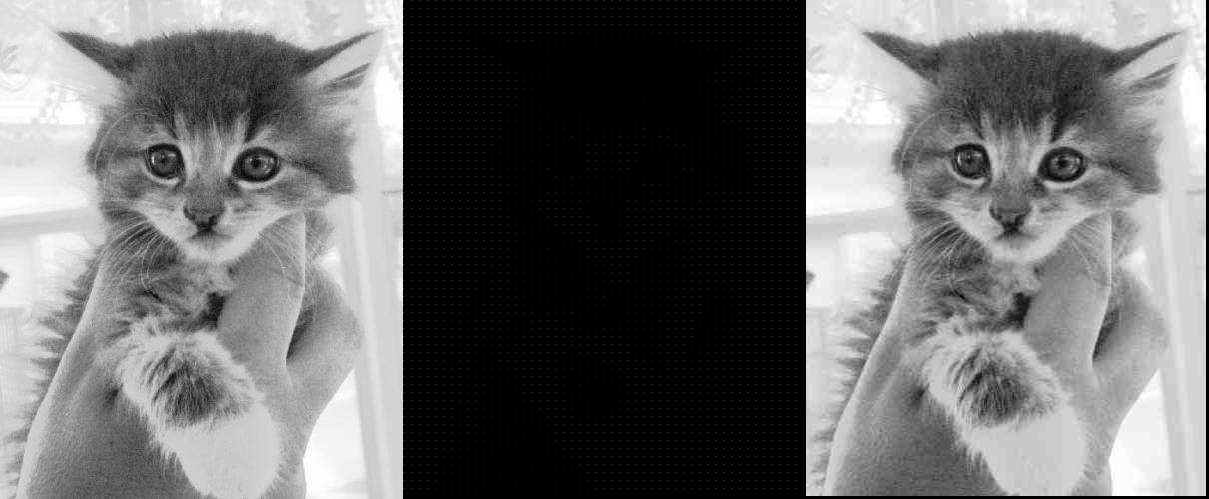

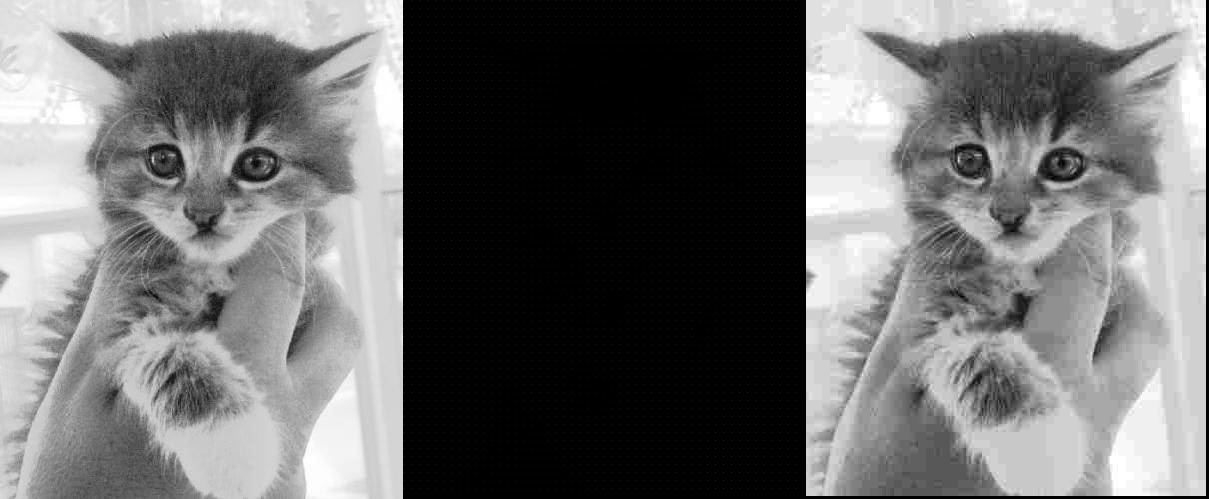

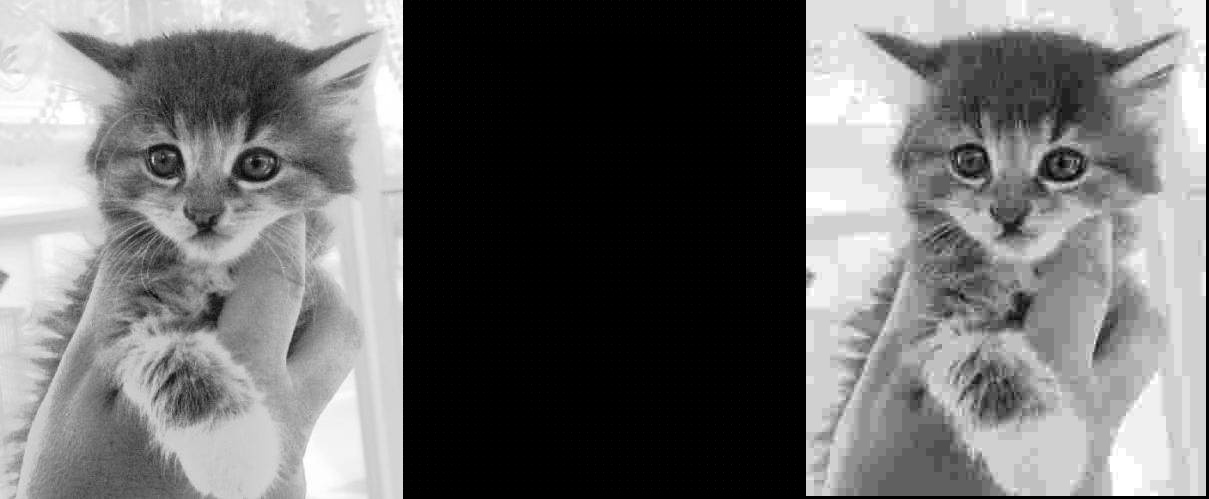

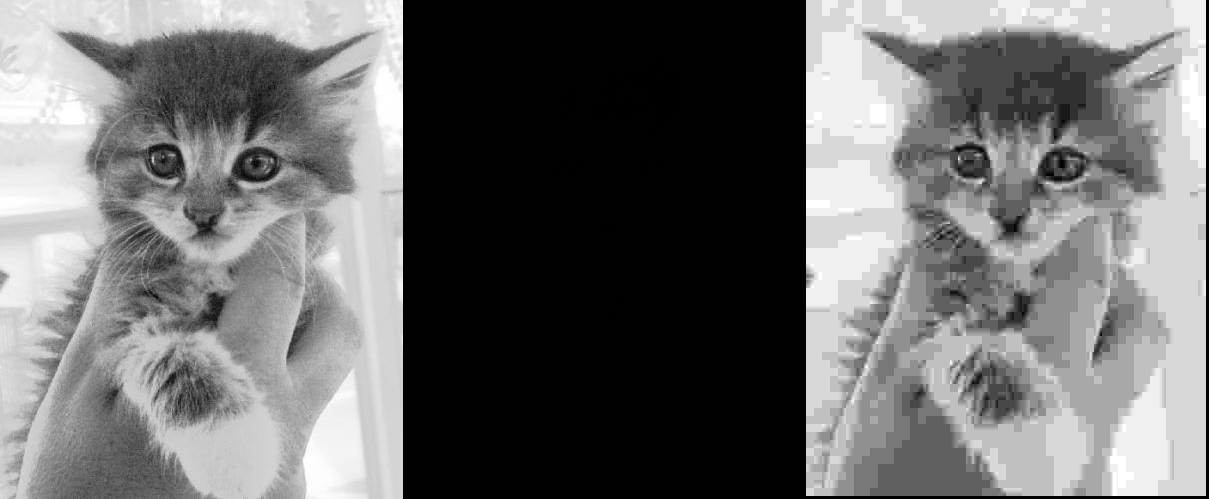

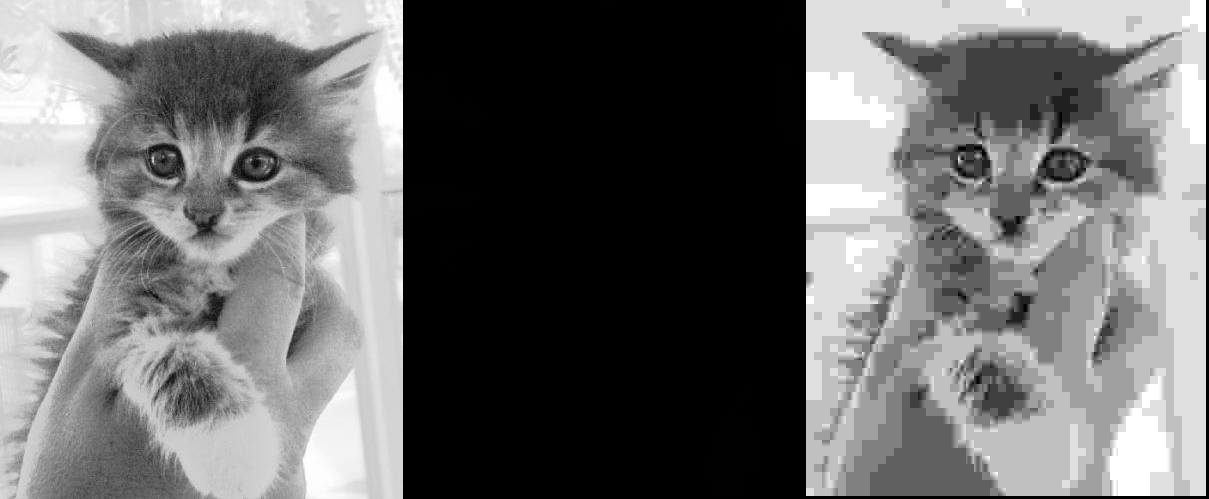

In [7]:
from IPython.display import Image, display

listOfImageNames = ['/content/drive/MyDrive/Colab Notebooks/output/result_IDCT_99.0.jpg',
                    '/content/drive/MyDrive/Colab Notebooks/output/result_IDCT_98.0.jpg',
                    '/content/drive/MyDrive/Colab Notebooks/output/result_IDCT_96.0.jpg',
                    '/content/drive/MyDrive/Colab Notebooks/output/result_IDCT_94.0.jpg',
                    '/content/drive/MyDrive/Colab Notebooks/output/result_IDCT_92.0.jpg']

for imageName in listOfImageNames:
    display(Image(filename=imageName))